Im vorliegenden Notebook sollen zwei Verfahren zur Nullstellen-Suche einer Funktion $f(x)$ programmiert und ausgeführt werden - das Bisektionsverfahren und das Sekantenverfahren.

Beim **Bisektionsverfahren** wird in einem durch die x-Werte $x_1$ und $x_2$ begrenztem Bereich nach der sich darin befindenden Nullstelle gesucht. Die Existenz der Nullstelle wird im ersten Schritt überprüft, indem geschaut wird, ob das Produkt der Funktionswerte $f(x_1)$ und $f(x_2)$ kleiner Null ist. Ist das der Fall, so wird das x-Intervall halbiert, indem ein neuer x-Wert $c=\frac{x_1+x_2}{2}$ generiert wird. Durch das Bilden der Produkte $f(x_1)\cdot f(c)$ und $f(x_2)\cdot f(c)$ wird dann wie zuvor getestet, in welchem der beiden Intervalle die Nullstelle liegt - welches der Produkte also negativ ist. \
Diese Intervallhalbierung wird so lange durchgeführt, bis der Absolutbetrag des Funktionswert $|f(c)|$ der aktuellen Nullstellen-Näherung kleiner einer gegebenen Toleranz ist.

Das **Sekantenverfahren** startet ebenfalls mit zwei x-Werten. Durch die beiden Punkte $P(x_1,f(x_1))$ und $Q(x_2,f(x_2))$ der Funktion $f(x)$ wird eine Sekante gelegt. Der Schnittpunkt dieser Sekante mit der x-Achse

$$x_{new} = x_2 - \frac{x_2-x_1}{f(x_2)-f(x_1)} \cdot f(x_2)$$

wird als neuer x-Wert für die nächste Sekante durch die Punkte $Q(x_2,f(x_2))$ und $S(x_{new},f(x_{new}))$ genutzt. Dies wird solange wiederholt, bis der der Absolutbetrag des Funktionswert $|f(x_{new})|$ des aktuellen x-Achsen-Schnittpunktes kleiner als eine gegebene Toleranz ist.

Nach dem Importieren der benötigten Bibliotheken wird zunächst die vorgegebene Funktion 

$$f(x, n)=(x+0.5)^n-2$$

definiert. Darauf folgt die Definition der oben beschriebenen Iterations-Funktionen, welche anschließend durch eine n-Schleife ausgeführt und dargestellt werden. \
Der Plot der Funktionen wurde so herangezoomt, dass die berechneten Nullstellen pi mal Daumen überprüft werden können.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x, n):
    return (x+0.5)**n-2

def func(n):
    x = np.linspace(0.5, 1.5, 10000)
    y = f(x, n)
    return x, y

def bisection(a, b, tol): #tol := Toleranz der Nullstellen-Genauigkeit 
    '''Berechnet die Näherung der Nullstelle für f(x) nach der Bisektionsmethode bis eine Genauigkeit von |f(x_null)|<tol erreicht ist.'''
    xl = a
    xr = b
    c = (xr+xl)/2.0
    while (np.abs(f(c, n)) >= tol):
        c = (xr+xl)/2.0
        prod = f(xl, n)*f(c, n)
        if prod > 0:
            xl = c
        elif prod < 0:
            xr = c
        elif f(c, n) == 0:
            return c
    return c

def secant(a, tol):
    '''Berechnet die Näherung der Nullstelle für f(x) nach der Sekantenmethode bis eine Genauigkeit von |f(x_null)|<tol erreicht ist.
    Die Anzahl der durchlaufenen Iterationen wird ausgegeben.'''
    x1 = a
    x2 = a + 1e-4
    xnew = x2 - (x2-x1)/(f(x2, n)-f(x1, n)) * f(x2, n)
    iteration = 1
    while (np.abs(f(xnew, n)) >= tol):
        xnew = x2 - (x2-x1)/(f(x2, n)-f(x1, n)) * f(x2, n)
        x1 = x2
        x2 = xnew
        iteration += 1
    return xnew, iteration




Die Nullstelle von f(x, 1) liegt nach der Bisektionsmethode bei x = 1.5000000074505806.
Die Nullstelle von f(x, 1) liegt nach der Sekantenmethode bei x = 1.5000000000001652. Dafür wurde(n) 1 Iteration(en) benötigt.
Die Nullstelle von f(x, 2) liegt nach der Bisektionsmethode bei x = 0.9142135605216026.
Die Nullstelle von f(x, 2) liegt nach der Sekantenmethode bei x = 0.914213562407611. Dafür wurde(n) 8 Iteration(en) benötigt.
Die Nullstelle von f(x, 3) liegt nach der Bisektionsmethode bei x = 0.7599210515618324.
Die Nullstelle von f(x, 3) liegt nach der Sekantenmethode bei x = 0.7599210499804423. Dafür wurde(n) 11 Iteration(en) benötigt.
Die Nullstelle von f(x, 4) liegt nach der Bisektionsmethode bei x = 0.6892071142792702.
Die Nullstelle von f(x, 4) liegt nach der Sekantenmethode bei x = 0.6892071150027375. Dafür wurde(n) 20 Iteration(en) benötigt.


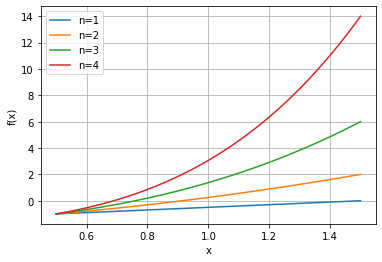

Als Matrix (n|bisec|secant) sieht das ganze so aus:
[[1.         1.50000001 1.5       ]
 [2.         0.91421356 0.91421356]
 [3.         0.75992105 0.75992105]
 [4.         0.68920711 0.68920712]]


In [3]:
results = np.zeros((4, 3)) #Leer-Matrix zum Befüllen mit den Werten von Bisektions-, Sekanten-Verfahren und zugehöriger Potenz n

for n in range(1, 5):
    x, y = func(n)
    plt.plot(x, y, label = f'n={n}')
    answerbi = bisection(-1, 2, 1e-8)
    answersec, iteration = secant(0, 1e-8)
    results[n-1] = [n, answerbi, answersec] #Befüllen der oben generierten Leer-Matrix
    print(f'Die Nullstelle von f(x, {n}) liegt nach der Bisektionsmethode bei x = {answerbi}.')
    print(f'Die Nullstelle von f(x, {n}) liegt nach der Sekantenmethode bei x = {answersec}. Dafür wurde(n) {iteration} Iteration(en) benötigt.')
plt.legend(loc="best")
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()
print("Als Matrix (n|bisec|secant) sieht das ganze so aus:")
print(results)

Folgend werden die Anzahl der benötigten Iterationen beim Berechnen der Nullstelle durch das Sekantenverfahren in Abhängigkeit der Startwerte dargestellt. (Welches Problem der Warn-Meldung zugrunde liegt, ist mir nicht so ganz klar...)

C:\Users\mzeja\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\mzeja\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\mzeja\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\mzeja\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\mzeja\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars


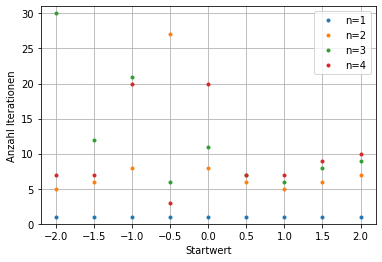

In [4]:
for n in np.arange(1, 5):
    xs, ys = [], [] #leere Listen zum Befüllen mit den Startwerten a und der zugehörigen Anzahl der Iterationen 
    for a in np.arange(-2, 2.5, 0.5):
        answer_sec, iteration = secant(a, 1e-8)
        xs.append(a)
        ys.append(iteration)
    plt.plot(xs, ys, linestyle='', marker='.', label=f'n={n}')
plt.ylim(0, 31)
plt.xlabel('Startwert')
plt.ylabel('Anzahl Iterationen')
plt.legend(loc='best')
plt.grid()
plt.show()